DATA EXPLORATION AND STATISTICAL TESTS

In [ ]:
import pandas as pd

ld = pd.read_csv('/content/loan_data.csv')
ld.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
len(ld)

45000

In [ ]:
missing_values = ld.isnull().sum()
print(missing_values)

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [ ]:
# Show the number of unique values in each column
unique_counts = data.nunique()
print(unique_counts)

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64


In [ ]:
info = ld.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# prompt: # prompt: Give me kolomogorov smirnov test between loan_status and all of the following rest of the attributes:
# # <class 'pandas.core.frame.DataFrame'>
# # RangeIndex: 45000 entries, 0 to 44999
# # Data columns (total 14 columns):
# #  #   Column                          Non-Null Count  Dtype
# # ---  ------                          --------------  -----
# #  0   person_age                      45000 non-null  float64
# #  1   person_gender                   45000 non-null  object
# #  2   person_education                45000 non-null  object
# #  3   person_income                   45000 non-null  float64
# #  4   person_emp_exp                  45000 non-null  int64
# #  5   person_home_ownership           45000 non-null  object
# #  6   loan_amnt                       45000 non-null  float64
# #  7   loan_intent                     45000 non-null  object
# #  8   loan_int_rate                   45000 non-null  float64
# #  9   loan_percent_income             45000 non-null  float64
# #  10  cb_person_cred_hist_length      45000 non-null  float64
# #  11  credit_score                    45000 non-null  int64
# #  12  previous_loan_defaults_on_file  45000 non-null  object
# #  13  loan_status                     45000 non-null  int64
# # dtypes: float64(6), int64(3), object(5)
# # memory usage: 4.8+ MB
# # None

import pandas as pd
from scipy.stats import ks_2samp

ld = pd.read_csv('/content/loan_data.csv')

# Convert relevant columns to numeric if needed
for col in ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
            'credit_score']:
    if ld[col].dtype == 'object':
      ld[col] = pd.to_numeric(ld[col], errors='coerce')

# Perform Kolmogorov-Smirnov test for numerical attributes
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
                  'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for col in numerical_cols:
    group0 = ld[ld['loan_status'] == 0][col]
    group1 = ld[ld['loan_status'] == 1][col]
    ks_stat, p_value = ks_2samp(group0, group1)
    print(f"Kolmogorov-Smirnov test for {col}:")
    print(f"  Statistic: {ks_stat}")
    print(f"  P-value: {p_value}")
    print("-" * 20)

# For categorical attributes, consider Chi-squared test or other suitable tests.
# Example for 'person_home_ownership':
# from scipy.stats import chi2_contingency
# contingency_table = pd.crosstab(ld['loan_status'], ld['person_home_ownership'])
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print("Chi-squared test for person_home_ownership")
# print("Statistic:", chi2)
# print("P-value:",p)


Kolmogorov-Smirnov test for person_age:
  Statistic: 0.030799999999999994
  P-value: 7.621468429318999e-07
--------------------
Kolmogorov-Smirnov test for person_income:
  Statistic: 0.2810857142857143
  P-value: 0.0
--------------------
Kolmogorov-Smirnov test for person_emp_exp:
  Statistic: 0.02939999999999998
  P-value: 2.8316763337691194e-06
--------------------
Kolmogorov-Smirnov test for loan_amnt:
  Statistic: 0.11944285714285718
  P-value: 3.781528195917655e-97
--------------------
Kolmogorov-Smirnov test for loan_int_rate:
  Statistic: 0.31560000000000005
  P-value: 0.0
--------------------
Kolmogorov-Smirnov test for loan_percent_income:
  Statistic: 0.35444285714285706
  P-value: 0.0
--------------------
Kolmogorov-Smirnov test for cb_person_cred_hist_length:
  Statistic: 0.022285714285714242
  P-value: 0.0008689028418131772
--------------------
Kolmogorov-Smirnov test for credit_score:
  Statistic: 0.012285714285714344
  P-value: 0.18939701266875364
--------------------


In [ ]:
# prompt: Give me a shapiro test between loan_status and all of the following rest of the attributes:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 45000 entries, 0 to 44999
# Data columns (total 14 columns):
#  #   Column                          Non-Null Count  Dtype
# ---  ------                          --------------  -----
#  0   person_age                      45000 non-null  float64
#  1   person_gender                   45000 non-null  object
#  2   person_education                45000 non-null  object
#  3   person_income                   45000 non-null  float64
#  4   person_emp_exp                  45000 non-null  int64
#  5   person_home_ownership           45000 non-null  object
#  6   loan_amnt                       45000 non-null  float64
#  7   loan_intent                     45000 non-null  object
#  8   loan_int_rate                   45000 non-null  float64
#  9   loan_percent_income             45000 non-null  float64
#  10  cb_person_cred_hist_length      45000 non-null  float64
#  11  credit_score                    45000 non-null  int64
#  12  previous_loan_defaults_on_file  45000 non-null  object
#  13  loan_status                     45000 non-null  int64
# dtypes: float64(6), int64(3), object(5)
# memory usage: 4.8+ MB
# None

import pandas as pd
from scipy.stats import shapiro

ld = pd.read_csv('/content/loan_data.csv')

# Select numerical columns for the Shapiro-Wilk test
numerical_cols = ld.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'loan_status' as it's the target variable
numerical_cols = numerical_cols.drop('loan_status')


for col in numerical_cols:
    statistic, p_value = shapiro(ld[col])
    print(f"Shapiro-Wilk Test for {col}:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")
    if p_value > 0.05:
        print("Data is likely normally distributed.")
    else:
        print("Data is likely not normally distributed.")
    print("-" * 20)

Shapiro-Wilk Test for person_age:
Statistic: 0.8147544952953742
P-value: 1.5359110772033097e-110
Data is likely not normally distributed.
--------------------
Shapiro-Wilk Test for person_income:
Statistic: 0.37950870799044734
P-value: 1.870507233014032e-145
Data is likely not normally distributed.
--------------------
Shapiro-Wilk Test for person_emp_exp:
Statistic: 0.7942435015054825
P-value: 2.2176717361465993e-113
Data is likely not normally distributed.
--------------------
Shapiro-Wilk Test for loan_amnt:
Statistic: 0.907294328888605
P-value: 9.877108168199712e-93
Data is likely not normally distributed.
--------------------
Shapiro-Wilk Test for loan_int_rate:
Statistic: 0.9832686064832863
P-value: 1.610028025349323e-55
Data is likely not normally distributed.
--------------------
Shapiro-Wilk Test for loan_percent_income:
Statistic: 0.9299341346974097
P-value: 5.565532034714001e-86
Data is likely not normally distributed.
--------------------
Shapiro-Wilk Test for cb_person_cre

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the dataset
ld = pd.read_csv('/content/loan_data.csv')

# Select numerical columns for the Wilcoxon rank-sum test
numerical_cols = ld.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'loan_status' as it's the target variable
numerical_cols = numerical_cols.drop('loan_status')

# Perform Wilcoxon rank-sum test for each numerical column, grouped by loan_status
for col in numerical_cols:
    group_0 = ld[ld['loan_status'] == 0][col]  # Group where loan_status = 0
    group_1 = ld[ld['loan_status'] == 1][col]  # Group where loan_status = 1

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')

    print(f"Wilcoxon Rank-Sum Test (Mann-Whitney U) for {col}:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")
    if p_value > 0.05:
        print("No significant difference between the groups (fail to reject the null hypothesis).")
    else:
        print("Significant difference between the groups (reject the null hypothesis).")
    print("-" * 40)

Wilcoxon Rank-Sum Test (Mann-Whitney U) for person_age:
Statistic: 182359052.0
P-value: 1.1627387280353391e-10
Significant difference between the groups (reject the null hypothesis).
----------------------------------------
Wilcoxon Rank-Sum Test (Mann-Whitney U) for person_income:
Statistic: 241825995.0
P-value: 0.0
Significant difference between the groups (reject the null hypothesis).
----------------------------------------
Wilcoxon Rank-Sum Test (Mann-Whitney U) for person_emp_exp:
Statistic: 181598416.0
P-value: 6.731452348334923e-09
Significant difference between the groups (reject the null hypothesis).
----------------------------------------
Wilcoxon Rank-Sum Test (Mann-Whitney U) for loan_amnt:
Statistic: 153933113.0
P-value: 1.2825613647430764e-75
Significant difference between the groups (reject the null hypothesis).
----------------------------------------
Wilcoxon Rank-Sum Test (Mann-Whitney U) for loan_int_rate:
Statistic: 99328485.0
P-value: 0.0
Significant difference b

In [ ]:
# prompt: loan_status is my target variable (1 or 0), do statistical analysis to find p-value between target variable (loan_status) and categorical attributes, turn off scientific notation, also give me the strength of correlation

import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'ld' DataFrame is already loaded as in the previous code

# Identify categorical columns
categorical_cols = ld.select_dtypes(include=['object']).columns

# Perform chi-square tests for categorical columns
results = []
for col in categorical_cols:
    contingency_table = pd.crosstab(ld['loan_status'], ld[col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramér's V for correlation strength
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = (phi2 / min( (k-1), (r-1)) )**0.5

    results.append({
        'Attribute': col,
        'P-value': p_value,
        'Cramér\'s V': cramers_v
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Display the results
results_df

,Attribute,P-value,Cramér's V
0,person_gender,0.91425,0.00051
1,person_education,0.73283,0.00669
2,person_home_ownership,0.00000,0.25775
3,loan_intent,0.00000,0.14218
4,previous_loan_defaults_on_file,0.00000,0.54304


In [ ]:
# prompt: give me amount of rows in each loan_status

# Assuming 'ld' DataFrame is already loaded as in the previous code
print(ld['loan_status'].value_counts())

loan_status
0    35000
1    10000
Name: count, dtype: int64


In [ ]:
# prompt: For the following:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 45000 entries, 0 to 44999
# Data columns (total 14 columns):
#  #   Column                          Non-Null Count  Dtype
# ---  ------                          --------------  -----
#  0   person_age                      45000 non-null  float64
#  1   person_gender                   45000 non-null  object
#  2   person_education                45000 non-null  object
#  3   person_income                   45000 non-null  float64
#  4   person_emp_exp                  45000 non-null  int64
#  5   person_home_ownership           45000 non-null  object
#  6   loan_amnt                       45000 non-null  float64
#  7   loan_intent                     45000 non-null  object
#  8   loan_int_rate                   45000 non-null  float64
#  9   loan_percent_income             45000 non-null  float64
#  10  cb_person_cred_hist_length      45000 non-null  float64
#  11  credit_score                    45000 non-null  int64
#  12  previous_loan_defaults_on_file  45000 non-null  object
#  13  loan_status                     45000 non-null  int64
# dtypes: float64(6), int64(3), object(5)
# memory usage: 4.8+ MB
# None
# i want to see mean values across numeric attributes and target variable (loan_status) 1 and 0

import pandas as pd

# Load the dataset (assuming it's already loaded as 'ld' in your provided code)
ld = pd.read_csv('/content/loan_data.csv')

# Group data by loan status and calculate the mean of numeric columns
numeric_cols = ld.select_dtypes(include=['float64', 'int64']).columns
median_values = ld.groupby('loan_status')[numeric_cols].median()

median_values


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
loan_status,,,,,,,,,
0,26.0,72928.0,4.0,8000.0,10.85,0.11,4.0,640.0,0.0
1,26.0,50629.0,3.0,9750.0,12.98,0.20,4.0,639.0,1.0


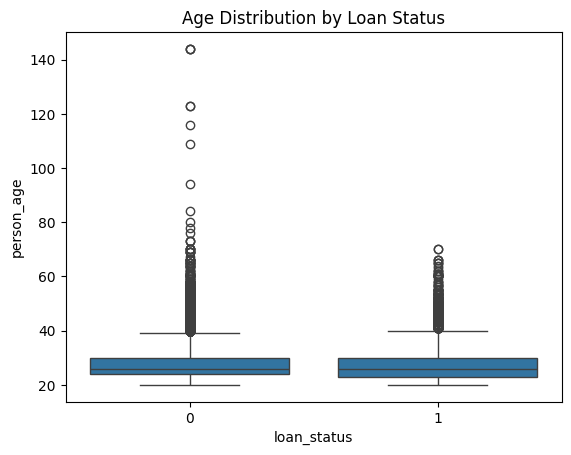

<ipython-input-6-7c806f3c3e85>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ld[ld['loan_status'] == 0]['person_age'], label="Not Approved", shade=True)
<ipython-input-6-7c806f3c3e85>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ld[ld['loan_status'] == 1]['person_age'], label="Approved", shade=True)


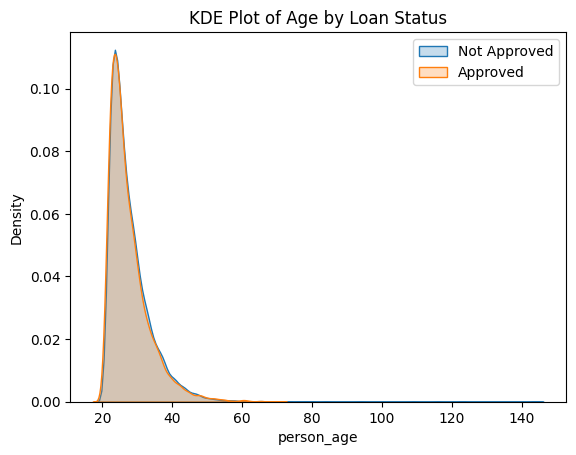

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=ld['loan_status'], y=ld['person_age'])
plt.title("Age Distribution by Loan Status")
plt.show()

sns.kdeplot(ld[ld['loan_status'] == 0]['person_age'], label="Not Approved", shade=True)
sns.kdeplot(ld[ld['loan_status'] == 1]['person_age'], label="Approved", shade=True)
plt.title("KDE Plot of Age by Loan Status")
plt.legend()
plt.show()

In [ ]:
# prompt: For the following:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 45000 entries, 0 to 44999
# Data columns (total 14 columns):
#  #   Column                          Non-Null Count  Dtype
# ---  ------                          --------------  -----
#  0   person_age                      45000 non-null  float64
#  1   person_gender                   45000 non-null  object
#  2   person_education                45000 non-null  object
#  3   person_income                   45000 non-null  float64
#  4   person_emp_exp                  45000 non-null  int64
#  5   person_home_ownership           45000 non-null  object
#  6   loan_amnt                       45000 non-null  float64
#  7   loan_intent                     45000 non-null  object
#  8   loan_int_rate                   45000 non-null  float64
#  9   loan_percent_income             45000 non-null  float64
#  10  cb_person_cred_hist_length      45000 non-null  float64
#  11  credit_score                    45000 non-null  int64
#  12  previous_loan_defaults_on_file  45000 non-null  object
#  13  loan_status                     45000 non-null  int64
# dtypes: float64(6), int64(3), object(5)
# memory usage: 4.8+ MB
# None
# i want to see contingency table across categotical attributes and target variable (loan_status) 1 and 0

import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'ld' DataFrame is already loaded as in the previous code
# Identify categorical columns
categorical_cols = ld.select_dtypes(include=['object']).columns

# Perform chi-square tests for categorical columns and display contingency tables
for col in categorical_cols:
    contingency_table = pd.crosstab(ld['loan_status'], ld[col])
    print(f"Contingency Table for {col}:")
    print(contingency_table)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square test results for {col}:")
    print(f"Chi2: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of freedom: {dof}")
    print("-" * 40)


Contingency Table for person_gender:
person_gender  female   male
loan_status                 
0               15674  19326
1                4485   5515

Chi-square test results for person_gender:
Chi2: 0.011593759269277155
P-value: 0.9142540404277906
Degrees of freedom: 1
----------------------------------------
Contingency Table for person_education:
person_education  Associate  Bachelor  Doctorate  High School  Master
loan_status                                                          
0                      9378     10381        479         9301    5461
1                      2650      3018        142         2671    1519

Chi-square test results for person_education:
Chi2: 2.0159398837088074
P-value: 0.732826935503778
Degrees of freedom: 4
----------------------------------------
Contingency Table for person_home_ownership:
person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         16345     78  2729  15848
1 